<a href="https://colab.research.google.com/github/Shalini-CEG/predicative-analysis/blob/main/Traffic_volume_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TRAFFIC VOLUME PREDICTION**

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
df = pd.read_csv('/content/Traffic_volume.csv')
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,02-10-2012 09:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,02-10-2012 10:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00,4918


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [182]:
df.shape

(48204, 9)

**CHECKING FOR NULL VALUES**

In [183]:
df.isnull().sum()

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         0
dtype: int64

**ANALYSIS**

In [184]:
df['Day'] = pd.to_datetime(df.date_time).dt.day
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,Day
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,02-10-2012 09:00,5545,10
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,02-10-2012 10:00,4516,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00,4767,10
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00,5026,10
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00,4918,10


In [185]:
df['Month'] = pd.to_datetime(df.date_time).dt.month
df['Year'] = pd.to_datetime(df.date_time).dt.year
df['Hour'] = pd.to_datetime(df.date_time).dt.hour

In [186]:
cdf = df.drop(['date_time'], axis = 1)
cdf.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,Day,Month,Year,Hour
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,10,2,2012,9
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,4516,10,2,2012,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,10,2,2012,11
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,10,2,2012,12
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,4918,10,2,2012,13


In [187]:
cdf.drop(['holiday'], axis=1, inplace=True)


In [188]:
cdf.head()

,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,Day,Month,Year,Hour
0,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,10,2,2012,9
1,289.36,0.0,0.0,75,Clouds,broken clouds,4516,10,2,2012,10
2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,10,2,2012,11
3,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,10,2,2012,12
4,291.14,0.0,0.0,75,Clouds,broken clouds,4918,10,2,2012,13


In [189]:
cdf.drop(['weather_description'], axis=1, inplace=True)
cdf.tail()

,temp,rain_1h,snow_1h,clouds_all,weather_main,traffic_volume,Day,Month,Year,Hour
48199,283.45,0.0,0.0,75,Clouds,3543,30,9,2018,19
48200,282.76,0.0,0.0,90,Clouds,2781,30,9,2018,20
48201,282.73,0.0,0.0,90,Thunderstorm,2159,30,9,2018,21
48202,282.09,0.0,0.0,90,Clouds,1450,30,9,2018,22
48203,282.12,0.0,0.0,90,Clouds,954,30,9,2018,23


In [190]:
cdf['rain_1h'].value_counts()

0.00     44737
0.25       948
0.51       256
1.02       123
0.30       121
         ...  
5.11         1
3.01         1
2.73         1
18.03        1
2.11         1
Name: rain_1h, Length: 372, dtype: int64

In [191]:
cdf['weather_main'].value_counts()

Clouds          15164
Clear           13391
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Squall              4
Name: weather_main, dtype: int64

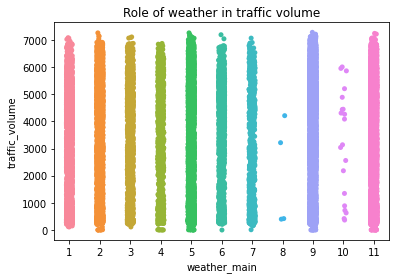

In [214]:
ax = sns.stripplot(x='weather_main', y='traffic_volume', data=cdf)
 
plt.title('Role of weather in traffic volume')

plt.show()

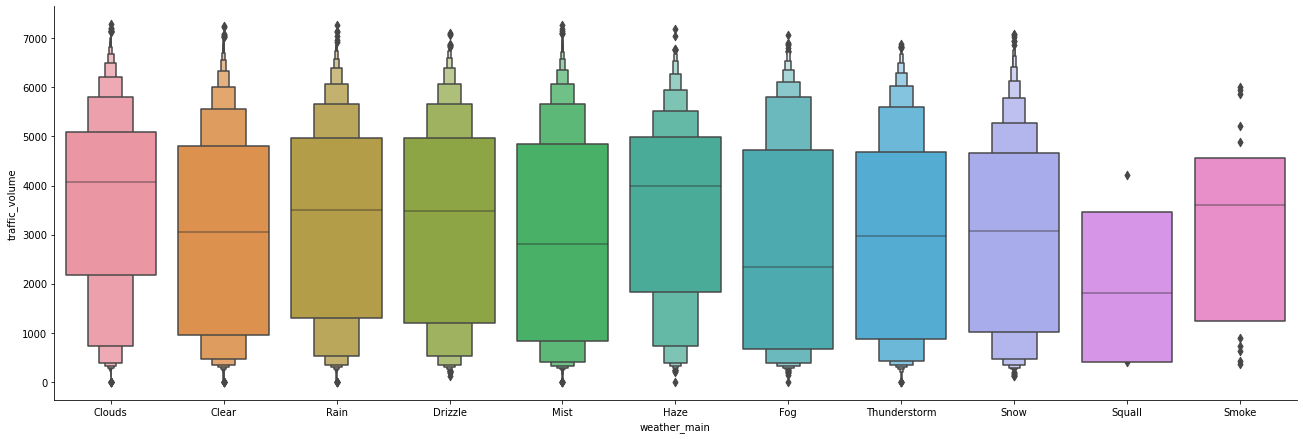

In [192]:
sns.catplot(x="weather_main", y="traffic_volume", data = cdf , kind = "boxen",height=6 , aspect=3)
plt.show()

LABEL ENCODING

In [193]:
cdf = cdf.replace({"Snow" : 1, "Rain" : 2, "Drizzle" : 3, "Thunderstorm": 4, "Mist": 5, "Haze": 6, "Fog": 7, "Squall" : 8, "Clouds" : 9, "Smoke": 10, "Clear" : 11 })

**FEATURE SELECTION**

In [194]:
cdf.columns

Index(['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'traffic_volume', 'Day', 'Month', 'Year', 'Hour'],
      dtype='object')

In [195]:
x = cdf.loc[:, ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
        'Day', 'Month', 'Year', 'Hour']]
x.tail()

,temp,rain_1h,snow_1h,clouds_all,weather_main,Day,Month,Year,Hour
48199,283.45,0.0,0.0,75,9,30,9,2018,19
48200,282.76,0.0,0.0,90,9,30,9,2018,20
48201,282.73,0.0,0.0,90,4,30,9,2018,21
48202,282.09,0.0,0.0,90,9,30,9,2018,22
48203,282.12,0.0,0.0,90,9,30,9,2018,23


In [196]:
y = cdf['traffic_volume']
y.head()

0    5545
1    4516
2    4767
3    5026
4    4918
Name: traffic_volume, dtype: int64

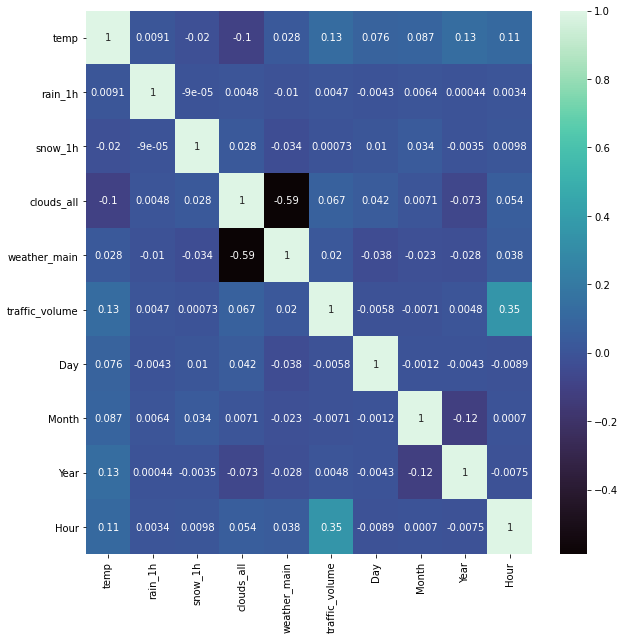

In [197]:
plt.figure(figsize=(10, 10))
sns.heatmap(cdf.corr(), annot=True, cmap="mako")
plt.show()

FIND FEATURE IMPORTANCE

In [198]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [199]:
selection.feature_importances_

array([6.05033130e-02, 7.76273928e-03, 1.13824050e-04, 2.40387355e-02,
       1.48733583e-02, 5.47273435e-02, 3.56326809e-02, 2.88839912e-02,
       7.73464014e-01])

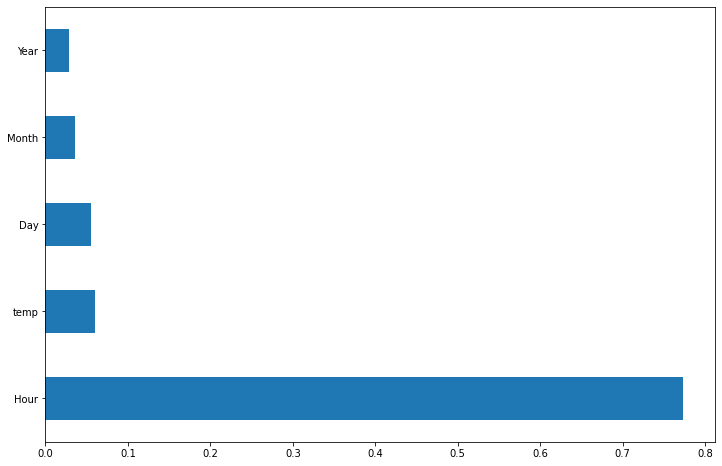

In [200]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

**RANDOM FOREST ALGORITHM**

In [201]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [202]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [203]:
y_pred = reg_rf.predict(X_test)

In [204]:
reg_rf.score(X_train, y_train)

0.9785482583897449

In [205]:
reg_rf.score(X_test, y_test)

0.8472496631005935

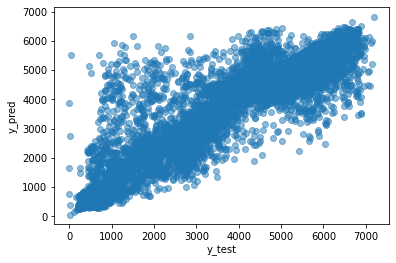

In [206]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [207]:
from sklearn import metrics

print(metrics.mean_squared_error(y_test, y_pred))

603900.5280860697


In [208]:
print(metrics.mean_absolute_error(y_test, y_pred))

489.7413795249455
